In [169]:
import pandas as pd

In [170]:
df = pd.read_csv('metrics.csv')
df['time'] = pd.to_datetime(df['_time'], unit='s')
df.head()

,_time,sys,name,value,time
0,1493413200,erib,Node1.login.LK,9918.0,2017-04-28 21:00:00
1,1493413200,erib,Node1.login.MB,56829.0,2017-04-28 21:00:00
2,1493413200,erib,Node1.login.SIRIUS,1024.0,2017-04-28 21:00:00
3,1493409600,erib,Node1.login.LK,18276.0,2017-04-28 20:00:00
4,1493409600,erib,Node1.login.MB,92611.0,2017-04-28 20:00:00


In [171]:
df['block'] = df.name.apply(lambda x: str(x).split('.')[0])
data = df[df.block.str.startswith('Node')].groupby(['block', 'time']).value.sum() \
        .reset_index().pivot('time', 'block', 'value').fillna(0).resample('1w').sum().dropna()
data.head()

block,Node1,Node2,Node3
time,,,
2016-05-22,158419.0,154568.0,28837.0
2016-07-03,360808.0,523542.0,44611.0
2016-07-10,80751.0,31230.0,9113.0
2016-07-17,270.0,99.0,10335.0
2016-08-07,72688.0,72597.0,605.0


In [172]:
import pdvega

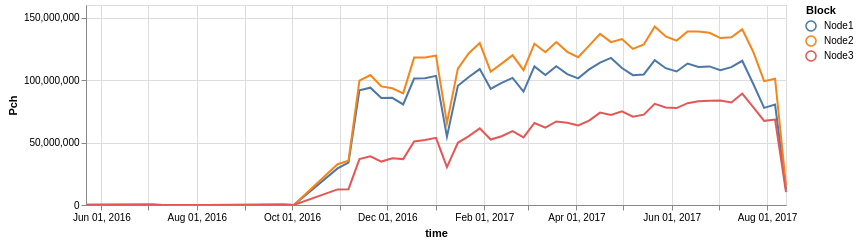

In [173]:
data.vgplot.line(width=700, height=200, var_name='Block', value_name='Pch', interactive=False)

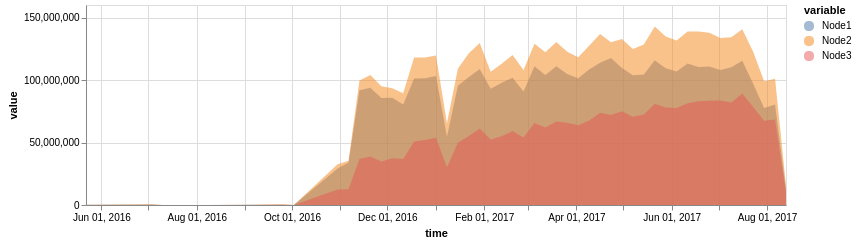

In [174]:
data.vgplot.area(stacked=False, alpha=0.5, width=700, height=200)

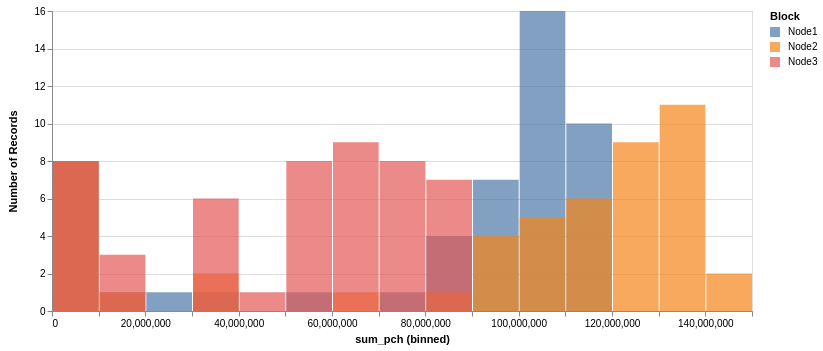

In [175]:
data[data>0].dropna().vgplot.hist(bins=25, histtype='bar', width=700, height=300, interactive=False, 
                                 var_name='Block', value_name='sum_pch')

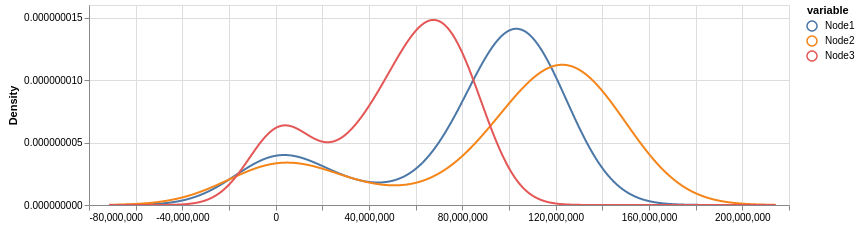

In [176]:
data[data>0].dropna().vgplot.kde(width=700, height=200, interactive=False)

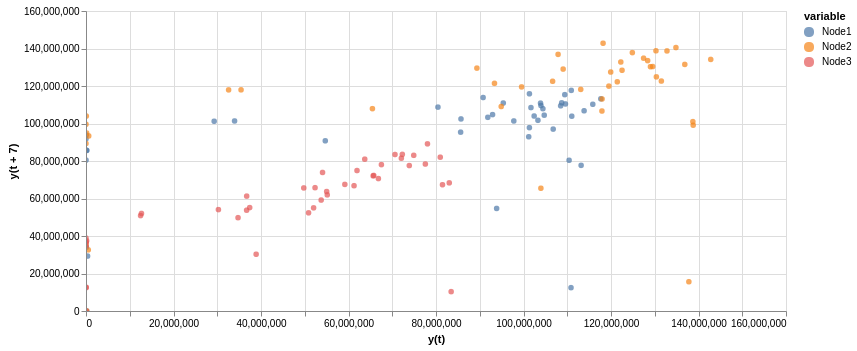

In [177]:
pdvega.lag_plot(data, lag=7, width=700)

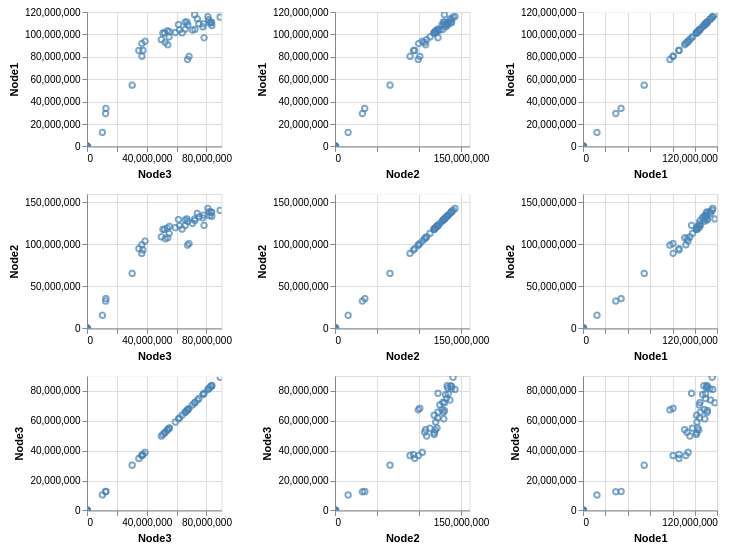

In [178]:
pdvega.scatter_matrix(data, figsize=(7, 7))